In [1]:
# pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, log_loss

In [3]:
#iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)
print(iris)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 100
TEST_SIZE=0.3

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2, #TEST_SIZE,
                                                 random_state=RANDOM_STATE,
                                                 shuffle= True, #default it is True
                                                 stratify=y)

In [8]:
# Do Standard Scaling after Splitting - so that scaling only happens on the four feature columns
from sklearn.preprocessing import StandardScaler # type: ignore

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Using Label Binarizer instead of pd.get_dummies() and doing one hot encoding.

from sklearn.preprocessing import LabelBinarizer # type: ignore
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [11]:
column = list(iris.feature_names)
data_df = pd.DataFrame(X, columns = column)
data_df['target'] = y

data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
data_df.describe() # Generate descriptive statistic

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# what labels are present?
data_df.target.unique()

array([0, 1, 2])

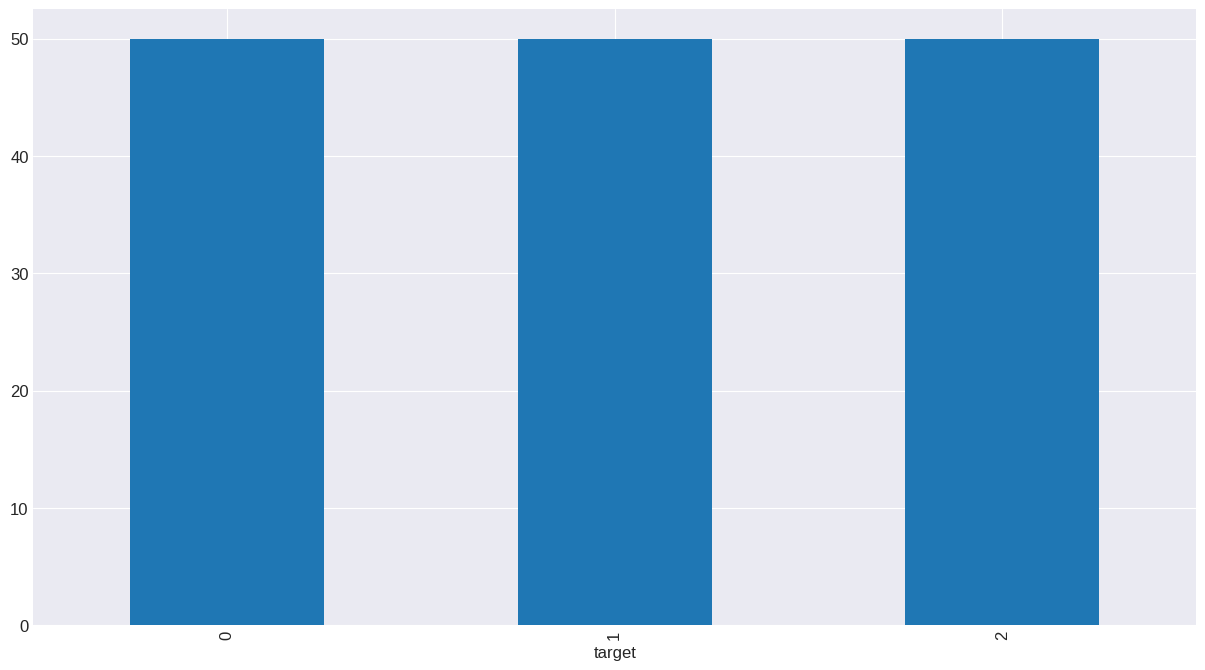

In [15]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

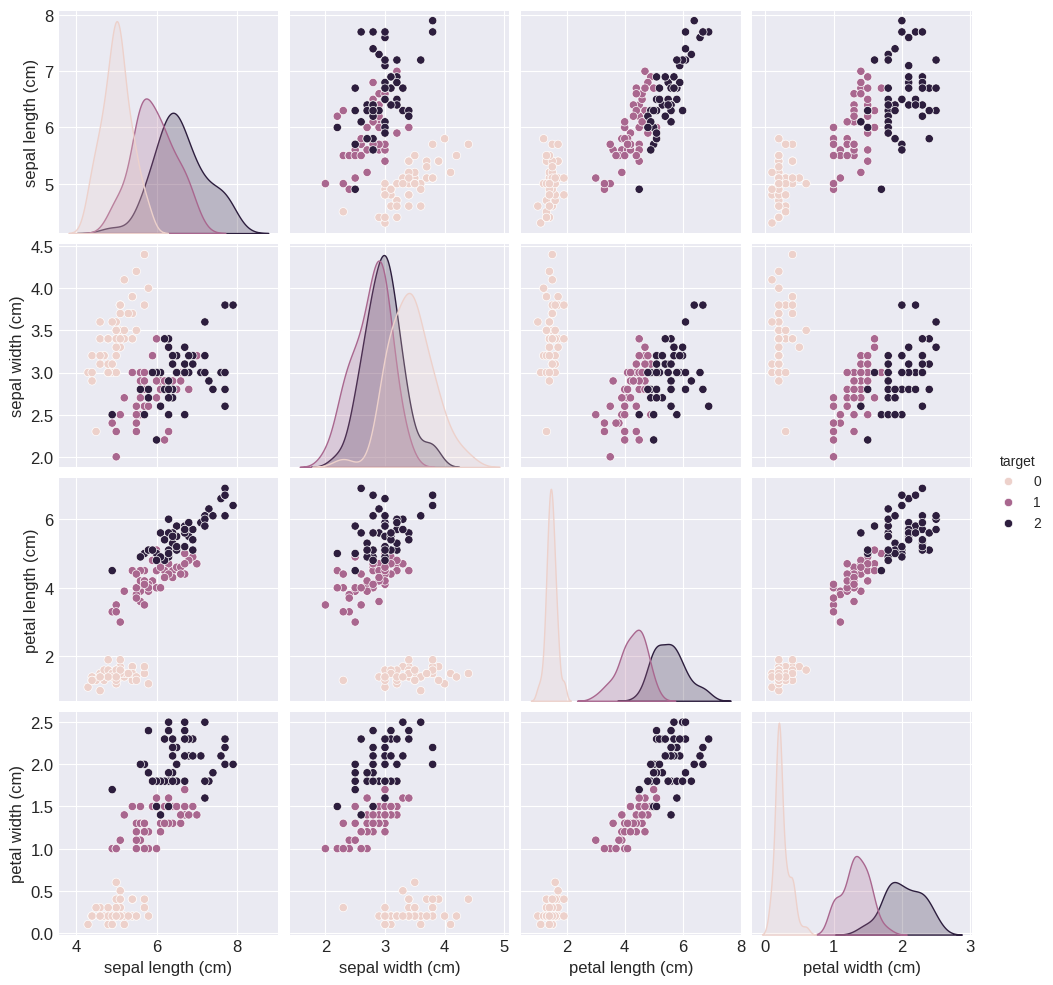

In [16]:
# Using Seaborn
# from warnings import filterwarnings
ax = sns.pairplot(data=data_df, # data from dataframe
                     hue='target'); # Color as per target column
# filterwarnings('ignore')

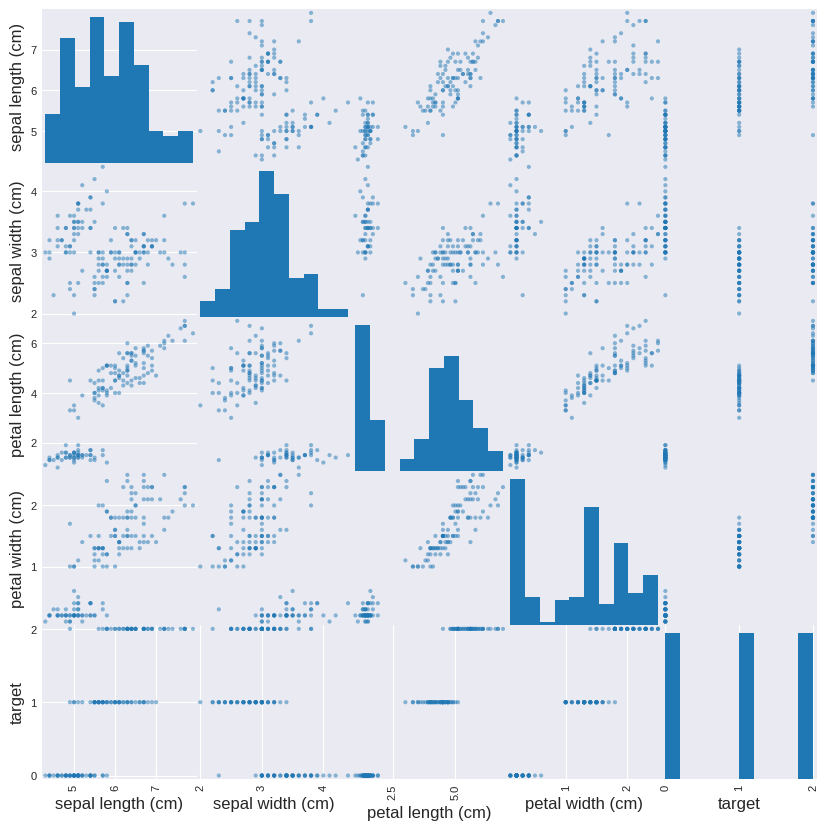

<Figure size 1500x800 with 0 Axes>

In [17]:
#### In case you want to plot X Array directly
pd.plotting.scatter_matrix(data_df,figsize=(10,10))
plt.figure();

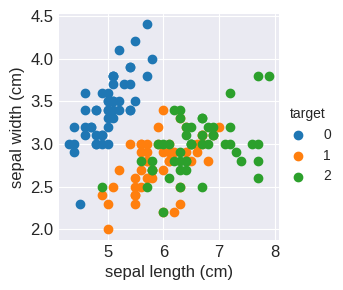

In [18]:
sns.FacetGrid(data_df, hue="target") \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.show()

In [19]:
#One hot encoding
# y = pd.get_dummies(y).to_numpy()
# y

In [20]:
y.shape

(150,)

In [21]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE,stratify=y)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [23]:
# type(data_train)

In [24]:
# data_train[0]

In [25]:
# weights = rng.random(data_train.shape[1])
# # w0,w1,w2
# # Z = x*w+b
# # Z= weights[0]
# weights

In [26]:
# Softmax function
def fn_softmax(z):
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

In [27]:
sm = fn_softmax(np.asarray([[8,5,0],[-10,0,10]]))
#sm.shape
sm.sum(axis=1).shape

(2,)

In [28]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(a):
    return 1-np.tanh(a)**2

In [29]:
def predict(model,X_p):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    # Layer1 
    z1 = X_p.dot(W1)+b1  # Aggregation
    a1 = fn_activ(z1)  # Activation

    #Layer 2
    z2=a1.dot(W2)+b2  # Aggregation
    a2=fn_softmax(z2)    # Activation
    return np.argmax(a2,axis=1) #Pick index of class with highest probability
    

In [30]:
def calculate_loss(model,X_l,y_l):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m=X_l.shape[0]
    ### Forward Propogation
    # Layer1 
    z1 = X_l.dot(W1)+b1  # Aggregation
    a1 = fn_activ(z1)  # Activation

    #Layer 2
    z2=a1.dot(W2)+b2  # Aggregation
    a2=fn_softmax(z2)    # Activation

    data_loss = -((y_l)*np.log(a2)+
                  (1-y_l)*np.log(1-a2)).sum() # Binary

    return data_loss / m

In [31]:
# wgts  = np.array([0.1,2.0,1.0])
# predict(data_train[0],wgts)

In [32]:
loss_hist = {}

In [33]:
def build_model(X_tr,y_tr,nn_hdim,nn_out,alpha=ALPHA,epochs=EPOCHS):
    m,nn_input_dim = X_tr.shape
    nn_output_dim = nn_out
    W1 = np.random.randn(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    W2 = np.random.randn(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    b1 = np.zeros((1,nn_hdim),dtype=np.float32)
    b2 = np.zeros((1,nn_output_dim),dtype=np.float32)
    curr_loss=0
    loss,epoch=[],[]
    for i in range(0,epochs):
        ### Forward Propogation
        # Layer1 Mark 3
        z1 = X_tr.dot(W1)+b1  # Aggregation   z = X.W +b
        a1 = fn_activ(z1)     # Activation  a=g(z)

        #Layer 2 Marked 1
        z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
        a2=fn_softmax(z2)   # Activation  a=g(z)
 
        ## Back propogation
        assert(a2.shape == y_tr.shape), f'check y {a2.shape}/{y.shape}'
        dz2 = a2 - y_tr # REMEMMBER dim of a2 and y to be same

        dW2 = (a1.T).dot(dz2)

        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check b2 {a1.shape}/{da1.shape}'

        #Layer 1 marked 4
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1  = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape == db1.shape), f'check b2 {b1.shape}/{db1.shape}'

        ### Gradient Update
        W1 += -alpha*dW1/m
        b1 += -alpha*db1/m
        W2 += -alpha*dW2/m
        b2 += -alpha*db2/m

        model = {'W1':W1,'b1':b1,
                 'W2': W2, 'b2': b2}
        
        curr_loss = calculate_loss(model,X_tr,y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        if i%1000 == 0:
            print(f'After epoch : {i:3d}; loss : {curr_loss:.5f}')

    loss_hist['epoch']=epoch
    loss_hist['loss']=loss

    return model

In [34]:
nn_output_dim=3 # like one hot encoding , the label binarizer also creates 3 columns
model = build_model(X_train,y_train,4,nn_output_dim)

After epoch :   0; loss : 2.06835
After epoch : 1000; loss : 0.11113
After epoch : 2000; loss : 0.09418
After epoch : 3000; loss : 0.08974
After epoch : 4000; loss : 0.08787
After epoch : 5000; loss : 0.08681
After epoch : 6000; loss : 0.08605
After epoch : 7000; loss : 0.08539
After epoch : 8000; loss : 0.08476
After epoch : 9000; loss : 0.08414


In [35]:
model

{'W1': array([[ 0.52504163, -0.41049097, -0.7157426 , -0.05665815],
        [-0.3425158 ,  0.63235504,  0.92661397, -0.55598068],
        [-2.21226415, -0.51488078, -0.92935446,  1.81979107],
        [-1.08765086, -0.48393518, -1.40687846,  1.80726368]]),
 'b1': array([[ 0.8225199 , -0.25718996, -1.2060318 , -2.7302463 ]],
       dtype=float32),
 'W2': array([[ 1.63056386,  1.4746737 , -1.76687571],
        [ 1.26390494, -0.52202392, -0.8714091 ],
        [ 3.9370914 , -2.43177139, -0.77972241],
        [-0.83935159, -2.05321881,  4.30924943]]),
 'b2': array([[ 0.19793566, -0.2078109 ,  0.00987513]], dtype=float32)}

In [36]:
loss_hist

{'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  

<Axes: xlabel='epoch'>

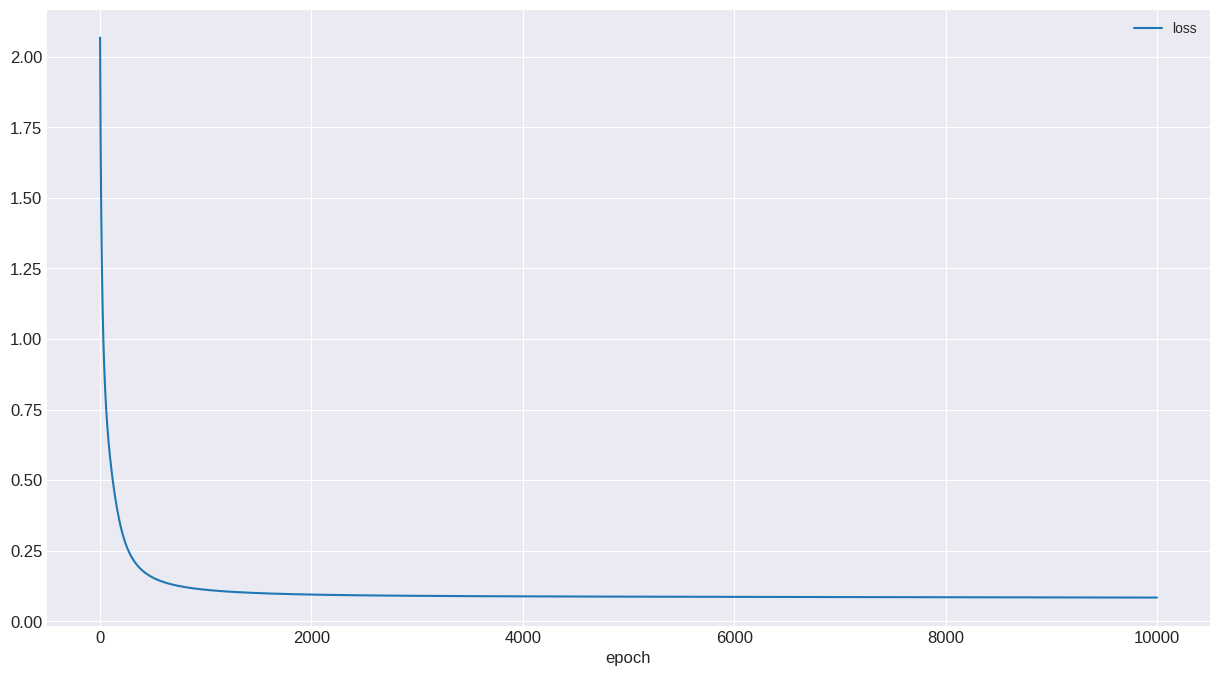

In [37]:
pd.DataFrame(loss_hist).plot(x='epoch')

In [38]:
y_pred = predict(model,X_train)
accuracy_score(y_train.argmax(axis=1),y_pred)

0.9833333333333333

In [39]:
# X = X_train
# fig,ax = plt.subplots()

# dm = 0.005
# x_min,x_max = X[:,0].min()-0.05,X[:,0].max()+0.05
# y_min,y_max = X[:,1].min()-0.05,X[:,1].max()+0.05

# xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
#                     np.arange(y_min,y_max,dm))

# XX = np.c_[xx.ravel(),yy.ravel()]
# y_pred = predict(model,XX)


# y_pred = predict(model,XX)
# Z = np.array(y_pred).reshape(xx.shape)
# ax.contourf(xx,yy,Z,cmap = CMAP,alpha=0.8)
# ax.scatter(X[:,0],X[:,1],c=y_train.argmax(axis=1),edgecolors='k',cmap=plt.cm.bwr)

# Test Data

In [40]:
y_pred = predict(model,X_test)
accuracy_score(y_test.argmax(axis=1),y_pred)

1.0

In [41]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

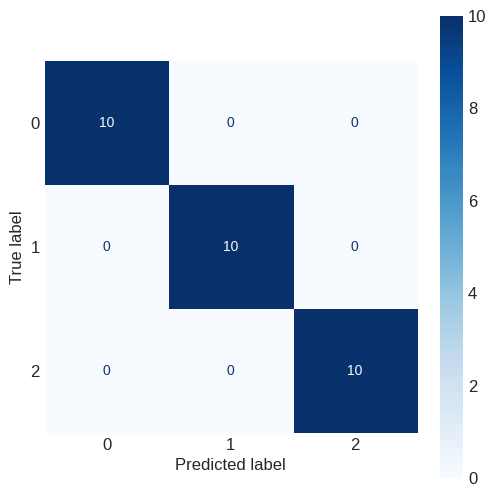

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1,2])
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.grid(False)